In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')


In [135]:
os.chdir('F:\TopMentor_DataScience\Batch 103 Day 37')
data = pd.read_csv('Mall_Customers.csv')
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [136]:
print(data.columns)
data['Annual Income (k$)'].value_counts()


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [137]:
print(data.shape)

(200, 5)


In [138]:
display (data[['Annual Income (k$)','Spending Score (1-100)']])
#display (data[['director_name']])

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [139]:
newdata=data.iloc[:,3:5].values
newdata


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [140]:
# calculate number of cluster needed using WCSS
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,n_init =10)
    kmeans.fit(newdata)
    wcss.append(kmeans.inertia_)  # inertia print the center value of Kmeans.
    kmeans.inertia_
    #print(kmeans)
display(wcss)

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37271.8862365895,
 30241.343617936593,
 24986.52564064288,
 21932.39204424098,
 19740.010370359305]

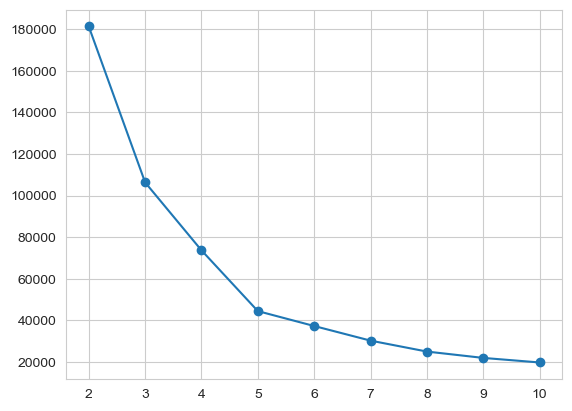

In [141]:
plt.plot(range(2,11),wcss,marker='o')

In [142]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,n_init =10)
kmeans.fit(newdata)
#display(kmeans.inertia_)
print(kmeans)

KMeans(n_clusters=5, n_init=10)


In [265]:
print('kmeans.cluster_centers_',kmeans.cluster_centers_)
print(kmeans.labels_)
y5=kmeans.labels_
y5

kmeans.cluster_centers_ [[1.43926559e+03 1.82240107e+04]
 [3.52389673e+02 1.08429458e+03]
 [9.51428571e+01 1.97428571e+05]
 [2.85000000e+02 6.40000000e+05]]
[1 0 0 ... 1 1 1]


array([1, 0, 0, ..., 1, 1, 1])

In [266]:
lables=pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])
cluster=pd.concat([data, pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])],axis=1)
cluster.head()
y5

array([1, 0, 0, ..., 1, 1, 1])

In [145]:
#lables=pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])

In [146]:
cluster.to_csv('KmeansCluster_MallInfo.csv')

In [267]:
print (len(kmeans.labels_))
print (type(kmeans.labels_))
label, count=np.unique(kmeans.labels_,return_counts=True)
dict(zip(label,count))
y5

5043
<class 'numpy.ndarray'>


array([1, 0, 0, ..., 1, 1, 1])

In [261]:

import colorcet as cc # LM plot circle colour 
#newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='Annual Income (k$)',y ='Spending Score (1-100)',data=newdata, hue='cluster',aspect=1,fit_reg=False)
plt.show()
y

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [270]:
display(y)
plt.figure(figsize=(20, 10))
plt.scatter(newdata[y5==0,0],newdata[y5==0,1],s=100,c='r',label='cluster-0')
plt.scatter(newdata[y5==1,0],newdata[y5==1,1],s=100,c='b',label='cluster-1')
plt.scatter(newdata[y5==2,0],newdata[y5==2,1],s=100,c='g',label='cluster-2')
plt.scatter(newdata[y5==3,0],newdata[y5==3,1],s=100,c='y',label='cluster-3')
plt.scatter(newdata[y5==4,0],newdata[y5==4,1],s=100,c='c',label='cluster-4')
plt.title ('K Means -Mall Customers')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend(fontsize =25)
plt.show()


array([1, 0, 0, ..., 1, 1, 1])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 200 but corresponding boolean dimension is 5043

<Figure size 2000x1000 with 0 Axes>

In [268]:
y5

#newdata[y==0,0],newdata[y==0,1],s=100,c=r,label='cluster-0'

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
#kmeans with 7 clusters
kmeans=KMeans(n_clusters=7,n_init =10)
kmeans.fit(newdata)
print('kmeans.cluster_centers_',kmeans.cluster_centers_)
print(kmeans.labels_)
lables=pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])
cluster=pd.concat([data, pd.DataFrame(kmeans.labels_,columns=['cluster-lables'])],axis=1)
cluster.head
print (len(kmeans.labels_))
print (type(kmeans.labels_))
label, count=np.unique(kmeans.labels_,return_counts=True)
dict(zip(label,count))
cluster['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
#Annual Income (k$)',y = 'Spending Score (1-100)
sns.lmplot(x= 'Annual Income (k$)',y = 'Spending Score (1-100)',data=cluster, hue='cluster',height=8,aspect=1,fit_reg=False)
plt.show()

In [ ]:
#newdata['cluster'] = kmeans.labels_

In [ ]:
df1=pd.read_csv('movie_metadata.csv')
df1.head()


In [189]:
####

###### Below is using movie data wiht new columns

## 

In [181]:
movie=df1[['director_facebook_likes','actor_1_facebook_likes']]

In [182]:
movie.head()

,director_facebook_likes,actor_1_facebook_likes
0,0,1000
1,563,40000
2,0,11000
3,22000,27000
4,131,131


In [183]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++',n_init =10)
    kmeans.fit(movie)
    wcss.append(kmeans.inertia_)
    #print(kmeans.inertia_)

print(wcss)

[689749472566.4313, 372658689911.6697, 208819931078.54266, 120809570095.8643, 92004866574.29437, 67080948082.0956, 45127260988.093124, 33534662188.113495, 24346577278.684536]


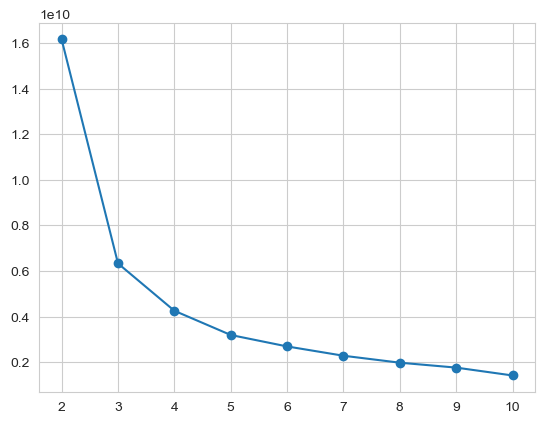

In [161]:
plt.plot(range(2,11), wcss, marker='o')

In [184]:
kmeans = KMeans (n_clusters = 5 , init = 'k-means++',n_init =10)
kmeans.fit(movie)
type(kmeans.labels_)
label, count=np.unique((kmeans.labels_),return_counts=True)

In [185]:
counts=dict(zip(label, count))
counts

{0: 3536, 1: 7, 2: 151, 3: 1, 4: 1348}

In [225]:
movie['label']=kmeans.labels_
movie
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_1_facebook_likes',data=movie,hue='label' ,height=5,aspect=1,fit_reg=False)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [190]:
####

###### Below is using movie data wiht new columns with scatter plot

## 

In [230]:
x1=df1[['director_facebook_likes','actor_1_facebook_likes']].values
x1

array([[    0,  1000],
       [  563, 40000],
       [    0, 11000],
       ...,
       [    0,     0],
       [    0,   946],
       [   16,    86]], dtype=int64)

[689749472566.4313, 372658689911.6697, 208819931078.54266, 120809570095.8643, 92413588998.97572]


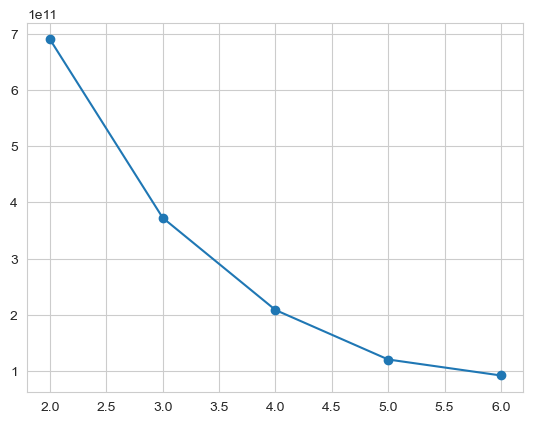

In [218]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,7):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++',n_init =10)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    #print(kmeans.inertia_)

print(wcss)
plt.plot(range(2,7), wcss, marker='o')

In [201]:
#plt.plot(range(2,7), wcss, marker='o')

In [234]:
kmeans = KMeans (n_clusters = 4 , init = 'k-means++',n_init =10)
kmeans.fit(x1)
y_kmeans=kmeans.labels_
#display(kmeans.labels_)
label, count=np.unique((kmeans.labels_),return_counts=True)
counts=dict(zip(label, count))
counts
display(y_kmeans)

array([1, 0, 0, ..., 1, 1, 1])

In [226]:
label_data=pd.DataFrame(kmeans.labels_,columns=['cluster_label'])
cluster=pd.concat([df1,label_data],axis=1)
cluster

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster_label
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,2
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,0
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,0
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,12,7.1,49.00,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,English,Canada,49,49,2013,470,7.7,49.00,84,2
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,49,49,593,7.5,16.00,32000,2
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,English,USA,49,1400,2013,0,6.3,49.00,16,2
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,English,USA,PG-13,49,2012,719,6.3,2.35,660,2


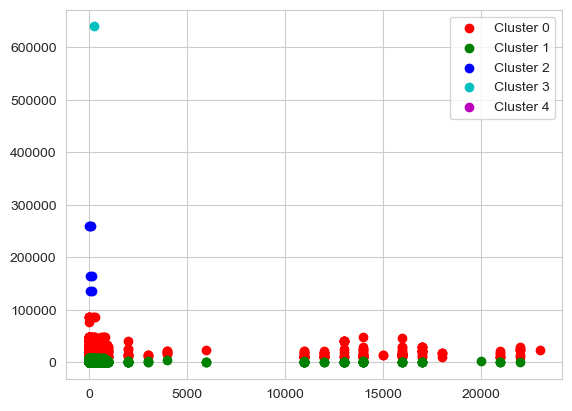

In [243]:
plt.scatter(x1[y_kmeans==0,0,],x1[y_kmeans==0,1],color='r')
plt.scatter(x1[y_kmeans==1,0,],x1[y_kmeans==1,1],color='g')
plt.scatter(x1[y_kmeans==2,0,],x1[y_kmeans==2,1],color='b')
plt.scatter(x1[y_kmeans==3,0,],x1[y_kmeans==3,1],color='c')
plt.scatter(x1[y_kmeans==4,0,],x1[y_kmeans==4,1],color='m')

plt.legend(['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3','Cluster 4',
            'Cluster 5','Cluster 6', 'Cluster 7'], loc= 'upper right')
plt.show()
